**Import bibliotek i załadowanie danych**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("covid_data.csv")
df['RETURNED_HOME'].replace(2, 0, inplace=True) 
df

,Unnamed: 0.1,Unnamed: 0,USMER,SEX,SEX_TYPE,RETURNED_HOME,DATE_DIED,DEATH,INTUBED,PNEUMONIA,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,TEST_RESULT,ICU
0,0,0.0,2,1,F,1,03/05/2020,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,1,1.0,2,2,M,1,03/06/2020,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0.0
2,2,2.0,2,2,M,0,09/06/2020,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
3,3,3.0,2,1,F,1,12/06/2020,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,4,4.0,2,2,M,1,21/06/2020,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019466,1048570,1048570.0,2,2,M,1,9999-99-99,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1019467,1048571,1048571.0,1,2,M,0,9999-99-99,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1019468,1048572,1048572.0,2,2,M,1,9999-99-99,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1019469,1048573,1048573.0,2,2,M,1,9999-99-99,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


**Podział liczby ofiar śmiertelnych, z pozytywnym wynikiem testu na COVID-19 wg. płci**

In [13]:
df['MALE']=np.where((df['SEX_TYPE']=='M') & df['TEST_RESULT']==1,1,0) # przypisanie wartości 1 dla mężczyzn z pozytywnym wynikiem testu i 0 dla pozostałych pacjentów

In [14]:
df['MALE_DEATH'] = np.where((df['SEX_TYPE']=='M') & df['TEST_RESULT']==1,1,0)*df["DEATH"] # przypisanie wartości 1 dla pacjentów płci męskiej z pozytywnym wynikiem testu, którzy zmarli na COVID

In [15]:
df['FEMALE']=np.where((df['SEX_TYPE']=='F')& df['TEST_RESULT']==1,1,0) # przypisanie wartości 1 dla kobiet z pozytywnym wynikiem testu i 0 dla pozostałych pacjentów

In [16]:
df['FEMALE_DEATH'] = np.where((df['SEX_TYPE']=='F') & df['TEST_RESULT']==1,1,0)*df["DEATH"] # przypisanie wartości 1 dla pacjentów płci żeńskiej z pozytywnym wynikiem testu, którzy zmarli na COVID

**Przypisanie ofiar do grup wiekowych z podziałem na płeć**

In [17]:
data=df[['AGE_RANGE','MALE','MALE_DEATH', 'FEMALE', 'FEMALE_DEATH']]

In [18]:
ds=data.groupby('AGE_RANGE').sum()
ds

,MALE,MALE_DEATH,FEMALE,FEMALE_DEATH
AGE_RANGE,,,,
AGE_0-18,5788,111,5609,87
AGE_19-30,32979,524,33275,303
AGE_31-40,45420,1952,40779,781
AGE_41-50,45457,5042,39281,2174
AGE_51-60,37492,8529,30274,4183
AGE_61-70,23131,9002,17562,5160
AGE_71-80,11834,6104,8843,3743
AGE_OVER_80,4548,2632,3753,1785


**Przygotowanie zmiennych, które posłużą nam do stworzenia wykresu**

In [33]:
font_color = '#525252' #kolor tekstu
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2' #kolor tła
color_red = '#fd625e' 
color_blue = '#01b8aa'
index = ds.index #opis kategorii wiekowych na osi y wykresu
column0 = ds['MALE_DEATH']/ds['MALE'] * 100 #dane do pierwszego wykresu (po lewej)
column1 = ds['FEMALE_DEATH']/ds['FEMALE'] * 100 #dane do drugiego wykresu (po prawej)
column2 = ds['MALE_DEATH'] #dane do pierwszego wykresu (po lewej)
column3 = ds['FEMALE_DEATH'] #dane do drugiego wykresu (po prawej)
title0 = 'Male deaths [%]' #tytuł pierwszego wykresu (po lewej)
title1 = 'Female deaths [%]' #tytuł do drugiego wykresu (po prawej)
title2 = 'Male deaths' #tytuł pierwszego wykresu (po lewej)
title3 = 'Female deaths' #tytuł do drugiego wykresu (po prawej)

**Wykres przedstawiający odsetek zgonów w poszczególnych grupach wiekowych z podziałem na płeć**

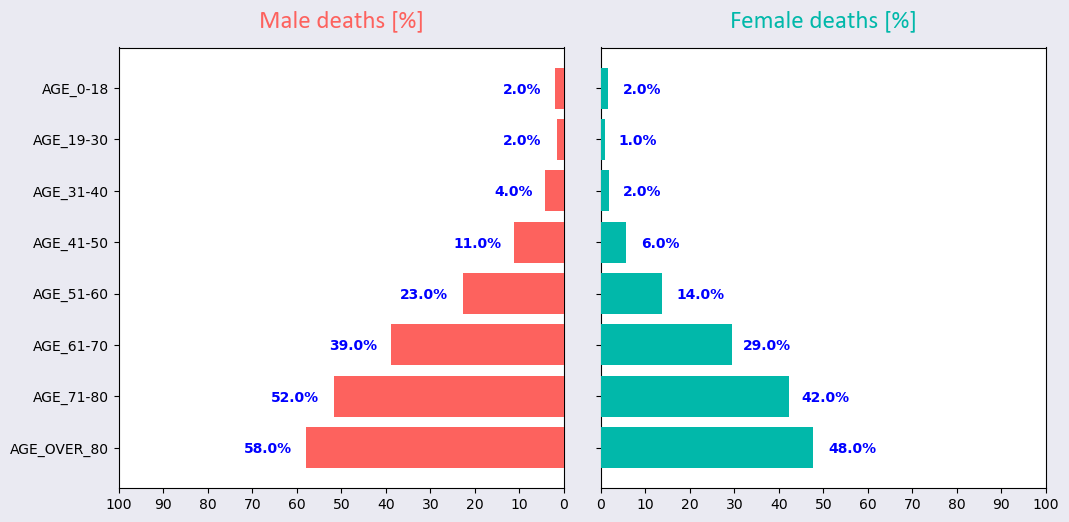

In [37]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=10) #definicja atrybutów słupków na lewym wykresie
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont) #tytuł wykresu po lewej
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10) #definicja atrybutów słupków na prawym wykresie
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont) #tytuł wykresu po prawej
           
# zmiana kierunku osi na lewym wykresie
axes[0].invert_xaxis() 

# szeregowanie grup wiekowych na osiach
plt.gca().invert_yaxis()

#podział osi poziomej
axes[0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) 
axes[1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

#etykiety/opisy słupków
labels0=list(round(ds['MALE_DEATH']/ds['MALE'] * 100))
for i, v in enumerate(labels0):
    axes[0].text(v+3, i + 0.1 , str(v) + "%", color='blue', fontweight='bold', ha='right')
    
labels1=list(round(ds['FEMALE_DEATH']/ds['FEMALE']*100))
for i, v in enumerate(labels1):
    axes[1].text(v + 3, i + 0.1, str(v) + "%", color='blue', fontweight='bold')
    

**Wykres przedstawiający liczbę zgonów w poszczególnych grupach wiekowych z podziałem na płeć**

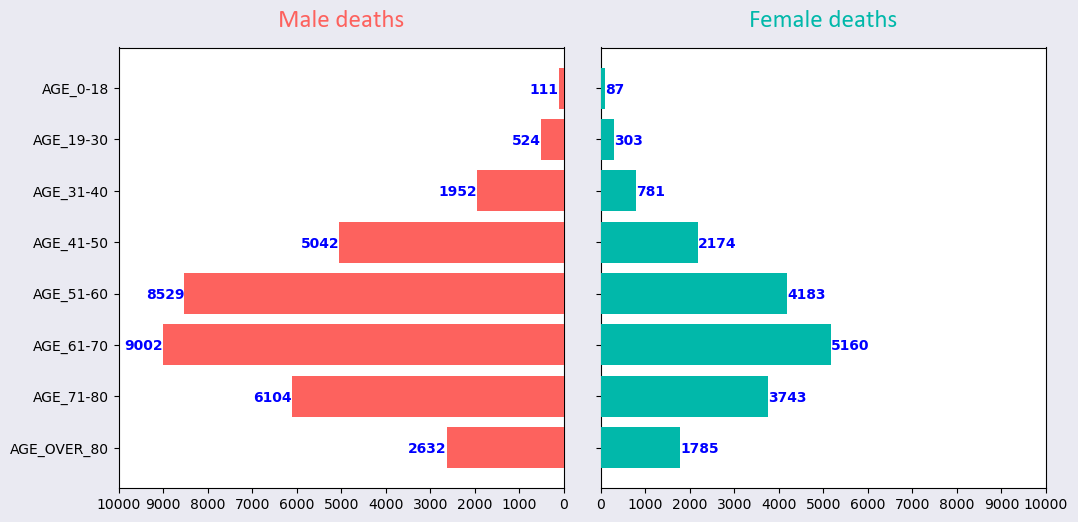

In [40]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column2, align='center', color=color_red, zorder=10)
axes[0].set_title(title2, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column3, align='center', color=color_blue, zorder=10)
axes[1].set_title(title3, fontsize=18, pad=15, color=color_blue, **hfont)
           
# zmiana kierunku osi na lewym wykresie
axes[0].invert_xaxis() 

# szeregowanie grup wiekowych na osiach
plt.gca().invert_yaxis()

#podział osi poziomej
axes[0].set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
axes[1].set_xticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])

#etykiety/opisy słupków
labels0=list(ds['MALE_DEATH'])
for i, v in enumerate(labels0):
    axes[0].text(v+3, i + 0.1 , str(v), color='blue', fontweight='bold', ha='right')
    
labels1=list(ds['FEMALE_DEATH'])
for i, v in enumerate(labels1):
    axes[1].text(v + 3, i + 0.1, str(v), color='blue', fontweight='bold')